In [1]:
import pandas as pd
import numpy as np
from joblib import dump, load

import string, os, random
import calendar

from functools import reduce

import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.patches import Circle
#from matplotlib.lines import Line2D

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.express as py

import warnings
warnings.filterwarnings("ignore")

In [103]:
"""
notebook: 1.1-simmler-data-preprocessing_accidents_severity_geo
---------------------------------------------------------------------
explore geo information vs severity
"""

'\nnotebook: 1.1-simmler-data-preprocessing_accidents_severity_geo\n---------------------------------------------------------------------\nexplore geo information vs severity\n'

In [2]:
#------------------------------------------------------------------------------------------------
# Import joblib file with 2019-2024 preprocessed data for accidents
#------------------------------------------------------------------------------------------------
#df_acc_severity = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity.joblib')
df_acc_severity = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_severity_reordered.joblib')

#zfill
#df_acc_severity['acc_department'] = df_acc_severity['acc_department'].str.zfill(2) #astype(str).
#df_acc_severity['acc_department'].unique()

display(df_acc_severity.head(3))
df_acc_severity.info()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.47012,48.89621,4.0,1.0,1,1.0,2.0,B01,2
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.47012,48.89621,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.36880,48.93070,3.0,1.0,1,1.0,6.0,A01,2


<class 'pandas.core.frame.DataFrame'>
Index: 651785 entries, 0 to 125186
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 651785 non-null  int64         
 1   acc_date                651785 non-null  datetime64[ns]
 2   acc_year                651785 non-null  int64         
 3   acc_month               651785 non-null  int64         
 4   acc_hour                651785 non-null  int64         
 5   acc_department          651785 non-null  object        
 6   acc_municipality        651785 non-null  object        
 7   acc_metro               651785 non-null  int64         
 8   acc_long                651785 non-null  float64       
 9   acc_lat                 651785 non-null  float64       
 10  acc_ambient_lightning   651774 non-null  float64       
 11  acc_atmosphere          651747 non-null  float64       
 12  acc_urbanization_level  651785 non-

In [3]:
# -------------------------------------------------------------------------------------------------
# copy file
# -------------------------------------------------------------------------------------------------

df_acc_target = df_acc_severity.copy()
df_acc_target.head()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type,ind_num_veh,ind_severity
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,B01,2
2,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0,A01,1
3,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0,A01,2
4,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,1
5,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0,A01,2


In [4]:
# -------------------------------------------------------------------------------------------------
# import lib_graph_2
# -------------------------------------------------------------------------------------------------

#colors
plot_color = 'deepskyblue'

colors_grav_org_order = {1: 'green', 2: 'darkred', 3: 'orange', 4: 'yellowgreen'}
colors_grav_reorder = {1: 'green', 2: 'yellowgreen', 3: 'orange', 4: 'darkred'}
colors_grav = colors_grav_org_order

import importlib
import lib_1_0_simmler_data_preprocessing_graph_1 as lib_graph_1
import lib_1_0_simmler_data_preprocessing_graph_2 as lib_graph_2

importlib.reload(lib_graph_1)
importlib.reload(lib_graph_2)


<module 'lib_1_0_simmler_data_preprocessing_graph_2' from 'C:\\Users\\asimm\\RepoDS4\\SEP25-BDS-Road-Accidents\\notebooks\\2-data-preprocessing\\lib_1_0_simmler_data_preprocessing_graph_2.py'>

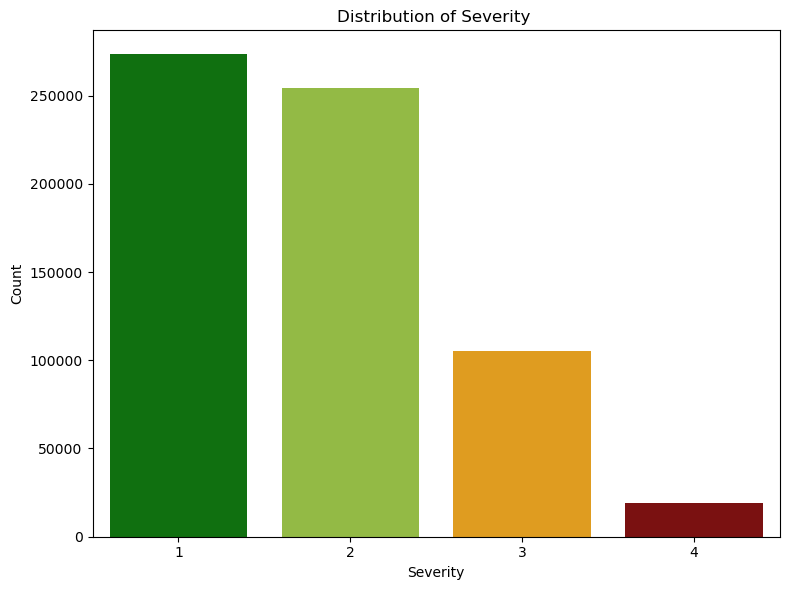

In [5]:
# -------------------------------------------------------------------------------------------------
# show reordered distribution of target variable
#
# the taget variable has an imbalanced distribution
# hospitalized persons and fatalities are much lower
# -------------------------------------------------------------------------------------------------

lib_graph_2.sns_countplot(df_acc_target, 'ind_severity', column_title='Severity', 
                          title='Distribution of Severity', palette_color=colors_grav_reorder)


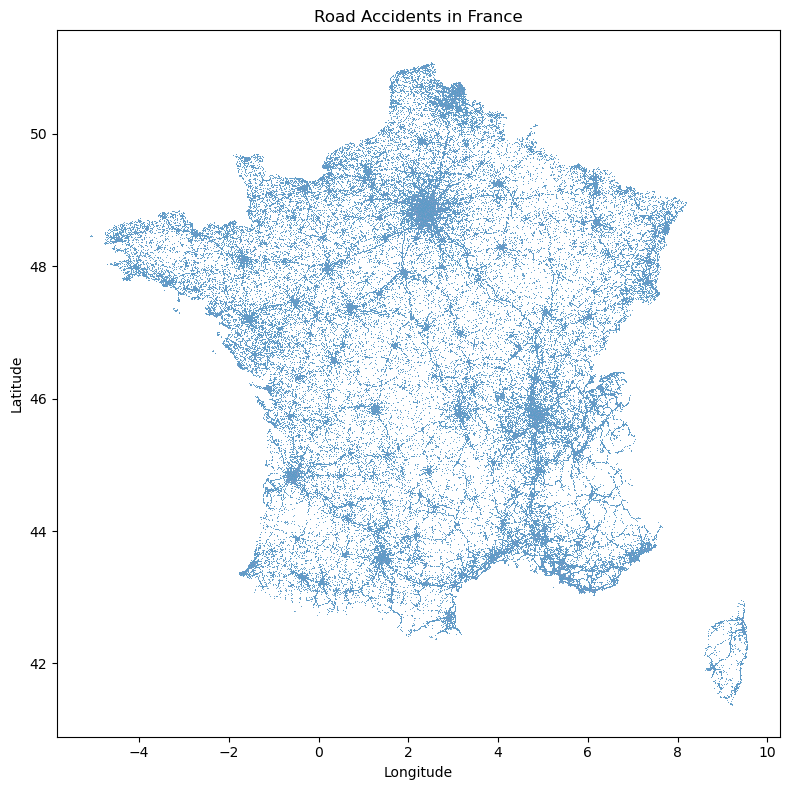

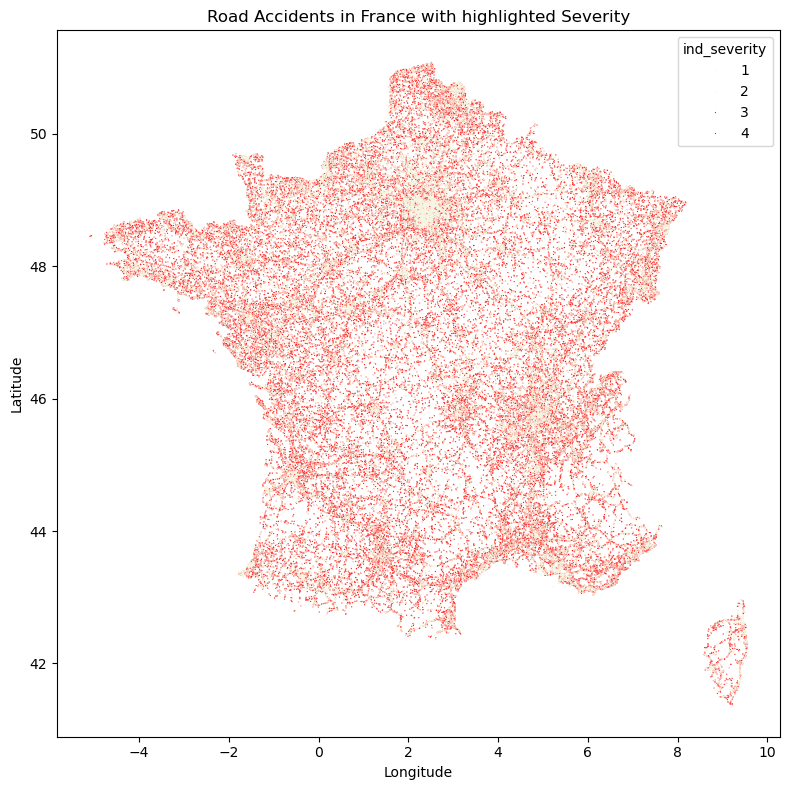

In [6]:
# -------------------------------------------------------------------------------------------------
# Map with accidents in Mainland France
#
# The map shows that accidents with high severity are distributed more evenly across the country
# -------------------------------------------------------------------------------------------------

def show_metro_accidents_map(char):
    
    data = char.loc[char['acc_metro'] == 1]
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=data, x='acc_long', y='acc_lat', s=0.5) #0.8 s=0.1 s=0.5
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"Road Accidents in France") 
    plt.tight_layout()
    plt.show()

def show_metro_accidents_map_severity(char):
    
    data = char.loc[char['acc_metro'] == 1]

    #whitesmoke beige lightcyan lavender azure
    #lightsteelblue dodgerblue deepskyblue darkturquoise deepskyblue cornflowerblue
    colors_grav_map = {1: 'beige', 2: 'beige', 3: 'red', 4: 'red'}
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=data, x='acc_long', y='acc_lat', hue='ind_severity', 
                    palette=colors_grav_map, s=0.8) #s=0.1 s=0.5
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"Road Accidents in France with highlighted Severity") 
    plt.tight_layout()
    plt.show()


show_metro_accidents_map(df_acc_target)
show_metro_accidents_map_severity(df_acc_target)


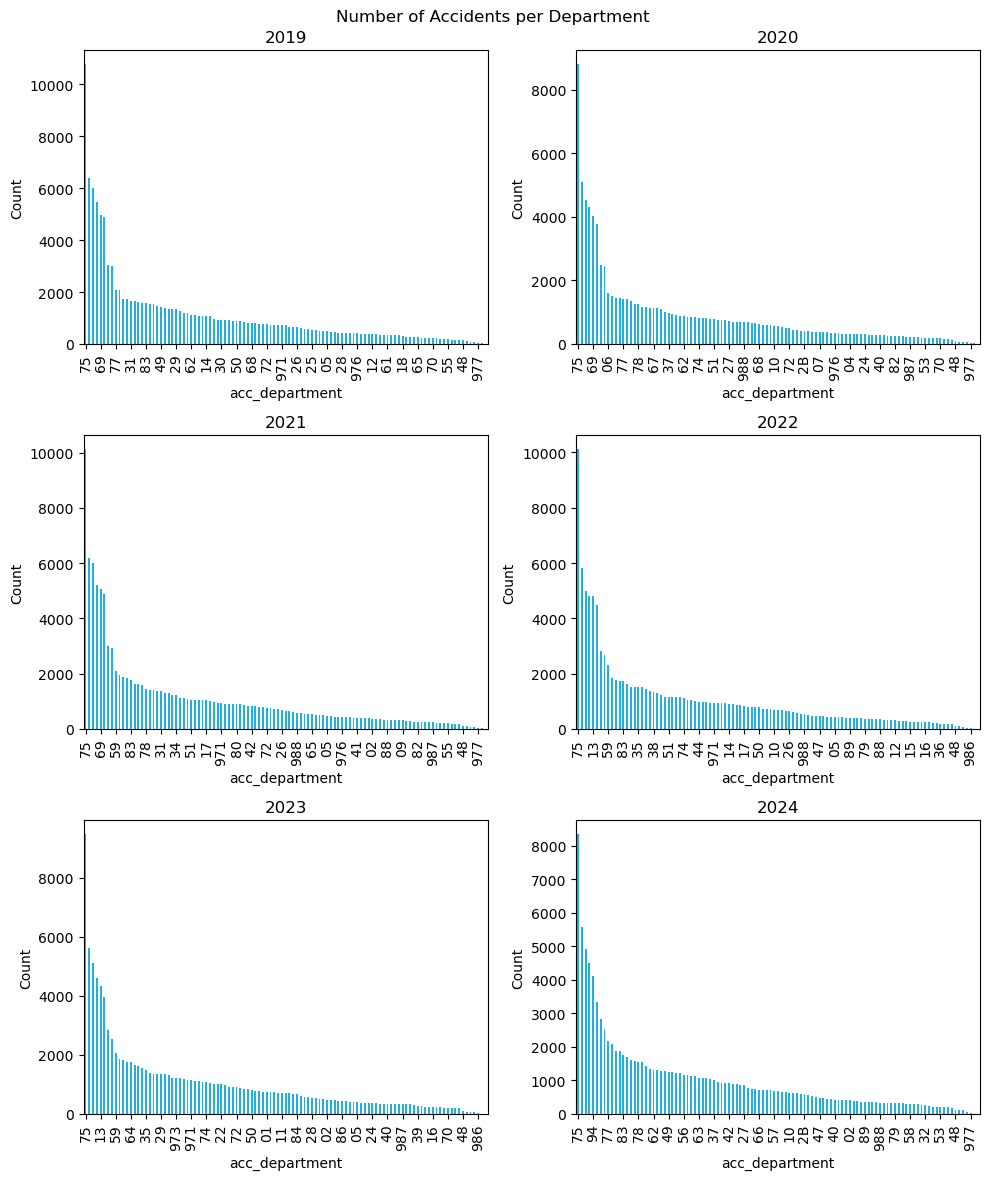

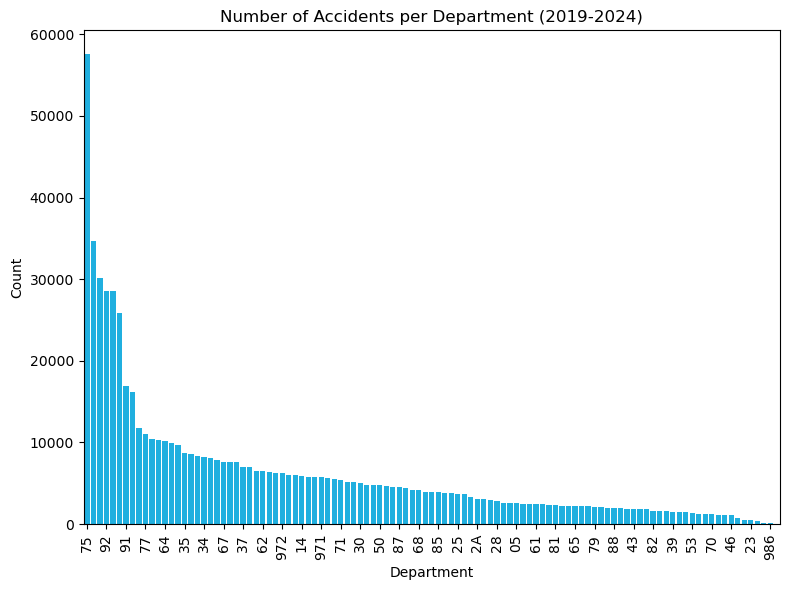

In [7]:
# -------------------------------------------------------------------------------------------------
# Distribution of accidents per department
#
# Paris (department 75) has much more accidents than any other department
# The distribution of accidents is imbalanced, reflecting imbalanced population distribution
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_1)

lib_graph_1.sns_countplot_years(df_acc_target, 'acc_department', column_title='Department', 
                           bar_width=0.5, xtick_freq=4, xtick_rotate=90, ordered=True)

lib_graph_1.sns_countplot(df_acc_target, 'acc_department', column_title='Department', #title='', 
                          title_postfix='(2019-2024)', 
                          bar_width=0.8, xtick_freq=3, xtick_rotate=90, ordered=True)


In [8]:
#------------------------------------------------------------------------------------------------
# the department with highest number of accident is paris
#------------------------------------------------------------------------------------------------

from IPython.display import HTML, Image

#/notebooks/2-data-preprocessing/
#/reports/figures/1.1-simmler-data-preprocessing_accidents_graphs/_pics/

path='../../reports/figures/1.1-simmler-data-preprocessing_accidents_graphs/_pics/'

def path_to_img_html(path, width=600):  
    return f'<img src="{path}" width="{width}px">'

#display in one col
img_paris = {'img_path': [path + 'dep_75_paris.png']}
df_img_paris = pd.DataFrame(img_paris)
df_img_paris['img_path'] = df_img_paris['img_path'].apply(path_to_img_html, width=600)
HTML(df_img_paris.to_html(escape=False, render_links=True))


,img_path
0,


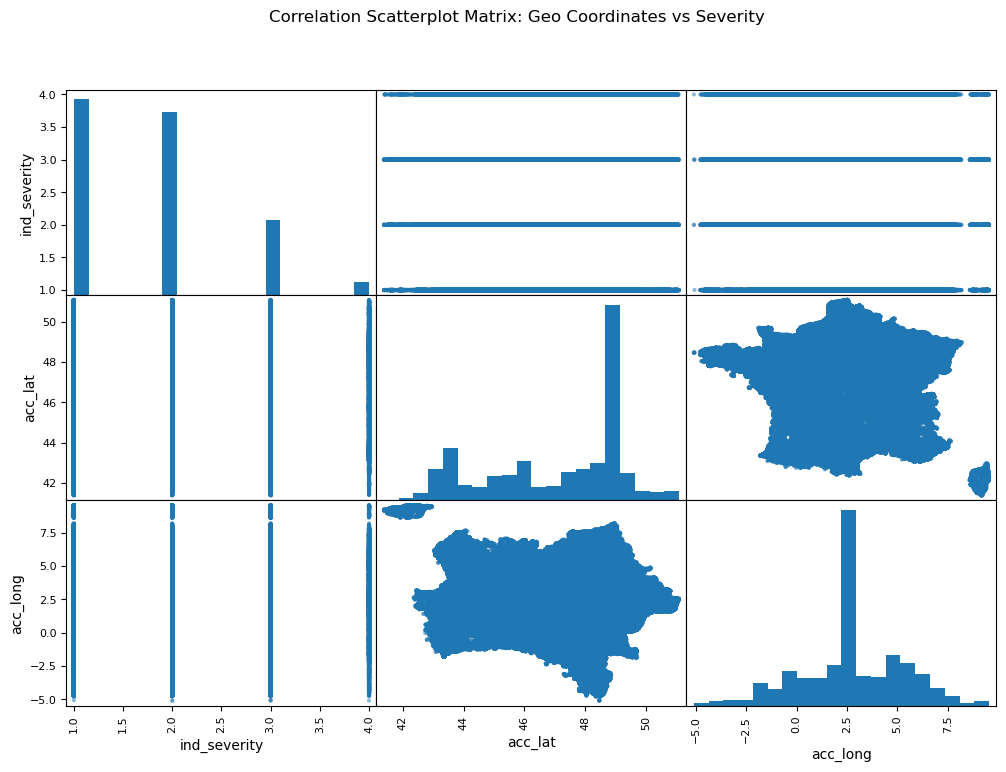

In [9]:
# -------------------------------------------------------------------------------------------------
# correlation matrix between long/lat and severity
#
# paris can be seen as the region (ca lat 49 long 2.5) with the highest peak in accidents
# all severity classes are represented
# -------------------------------------------------------------------------------------------------
from pandas.plotting import scatter_matrix

cols = ["ind_severity", "acc_lat", "acc_long"] 

filtered_df = df_acc_target[df_acc_target['acc_metro'] == 1]

scatter_matrix(filtered_df[cols], hist_kwds={'bins': 20}, figsize = (12,8))

#plt.title("Figure 1. Correlation Scatterplot Matrix: Geo Coordinates vs Severity", x = -0.5, y = -0.50)
plt.suptitle('Correlation Scatterplot Matrix: Geo Coordinates vs Severity', ha='center')
plt.show()


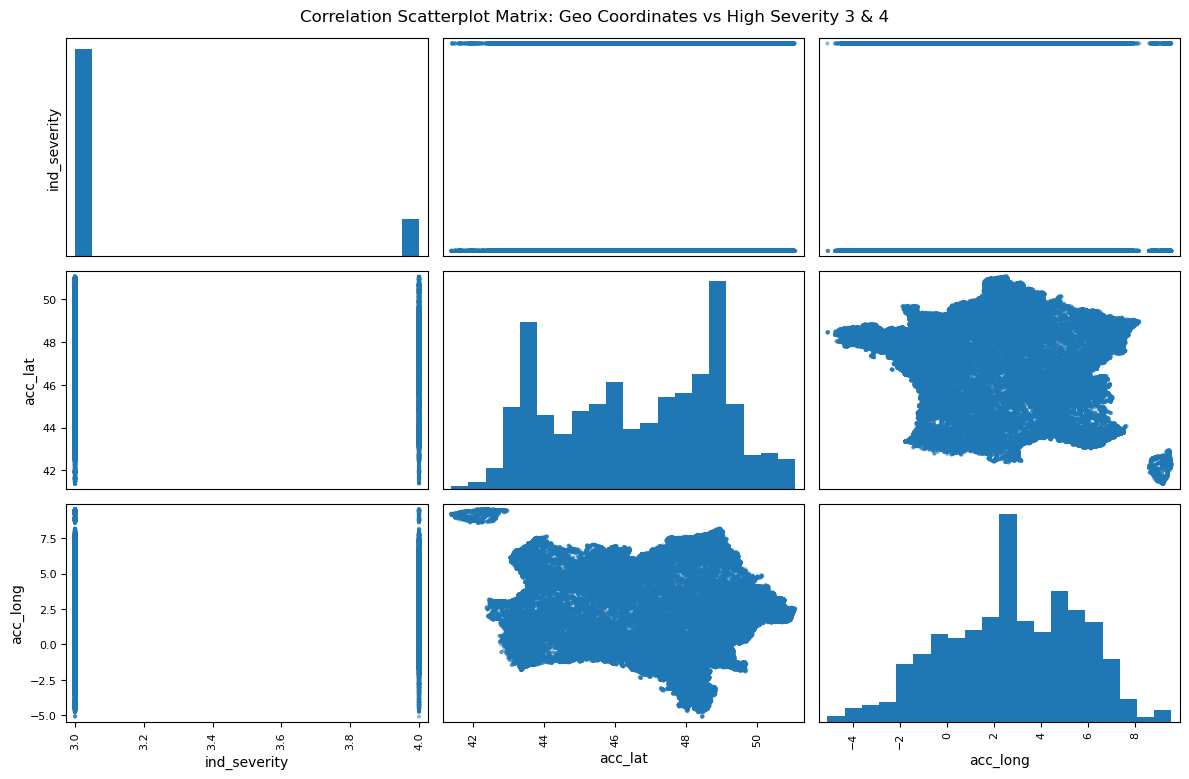

In [10]:
# -------------------------------------------------------------------------------------------------
# correlation matrix between long/lat and severity, filtered for high severity classes 3 & 4
#
# long/lat coordinates show a different distribution, with a 2nd peak appearing at lat 44 long 5
# -------------------------------------------------------------------------------------------------
from matplotlib.ticker import MaxNLocator

filtered_df_3_4 = df_acc_target[(df_acc_target['acc_metro'] == 1) & (df_acc_target['ind_severity'] > 2)]

axes = scatter_matrix(filtered_df_3_4[cols], hist_kwds={'bins': 20}, figsize = (12,8))

for i, ax_row in enumerate(axes):
        for j, ax in enumerate(ax_row):
            if (i==0) | (i == 2 & j == 0):
                
                ax.set_xticks([])
                ax.set_yticks([])
                
                #ax.xaxis.set_major_locator(MaxNLocator(nbins=2))
                #ax.set_xticklabels(['3', '4'], ha='center') #rotation=0, ha='right'
                #ax.yaxis.set_major_locator(MaxNLocator(nbins=2))
                #ax.set_yticklabels(['3', '4'], ha='center') #rotation=0, ha='right'

#plt.title("Figure 2. Correlation Scatterplot Matrix: Geo Coordinates vs High Severity 3 & 4",  x = -0.5, y = -0.50)
plt.suptitle('Correlation Scatterplot Matrix: Geo Coordinates vs High Severity 3 & 4', ha='center')
plt.tight_layout()
plt.show()


In [11]:
#------------------------------------------------------------------------------------------------
# Import joblib file with population data
#------------------------------------------------------------------------------------------------
df_dep_pop = load(r'..\..\data\processed\1_exploration/1.0-simmler-dep_pop_fr_2019.joblib')

#zfill
df_dep_pop['dep_no'] = df_dep_pop['dep_no'].astype(str).str.zfill(2)

display(df_dep_pop.head(3))
#df_dep_pop.info()

df_dep_pop['dep_no'].unique()

,dep_no,dep_name,dep_capital,region_1,region_2,population,area,population_density
0,01,Ain,Bourg-en-Bresse,Rhône-Alpes,Auvergne-Rhône-Alpes,652432,5762,113
1,02,Aisne,Laon,Picardy,Hauts de France,531345,7369,72
2,03,Allier,Moulins,Auvergne,Auvergne-Rhône-Alpes,335975,734,46


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '971', '972', '973', '974',
       '976', '2A', '2B'], dtype=object)

In [12]:
#------------------------------------------------------------------------------------------------
# groupby acc_department and ind_severity
#------------------------------------------------------------------------------------------------

#df_acc_target.info()

df_acc_target_count = df_acc_target.groupby(['acc_department', 'ind_severity'])['ind_severity'].count().reset_index(name='count')
df_acc_target_count = df_acc_target_count.rename(columns={'count': 'acc_count'})

col_order = ['acc_department', 'acc_count', 'ind_severity']
df_acc_target_count = df_acc_target_count[col_order]

df_acc_target_count.head()


,acc_department,acc_count,ind_severity
0,01,1894,1
1,01,1842,2
2,01,1209,3
3,01,232,4
4,02,892,1


In [13]:
#------------------------------------------------------------------------------------------------
# merge population info
#------------------------------------------------------------------------------------------------

df_acc_target_pop = pd.merge(df_acc_target_count, df_dep_pop, left_on='acc_department', right_on='dep_no', how='left')

df_acc_target_pop.drop(['dep_no', 'region_2', 'area'], axis=1, inplace=True)
df_acc_target_pop = df_acc_target_pop.rename(columns={'region_1': 'region'})

df_acc_target_pop.head()


,acc_department,acc_count,ind_severity,dep_name,dep_capital,region,population,population_density
0,01,1894,1,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0
1,01,1842,2,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0
2,01,1209,3,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0
3,01,232,4,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0
4,02,892,1,Aisne,Laon,Picardy,531345.0,72.0


In [14]:
#------------------------------------------------------------------------------------------------
# add accident density, multiply with 100000
#------------------------------------------------------------------------------------------------

df_acc_target_pop['acc_density'] = 100000 * df_acc_target_pop['acc_count'] / df_acc_target_pop['population']
df_acc_target_pop['acc_density'] = df_acc_target_pop['acc_density'].round(0)

df_acc_target_pop.head()


,acc_department,acc_count,ind_severity,dep_name,dep_capital,region,population,population_density,acc_density
0,01,1894,1,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0,290.0
1,01,1842,2,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0,282.0
2,01,1209,3,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0,185.0
3,01,232,4,Ain,Bourg-en-Bresse,Rhône-Alpes,652432.0,113.0,36.0
4,02,892,1,Aisne,Laon,Picardy,531345.0,72.0,168.0


In [15]:
#------------------------------------------------------------------------------------------------
# drop nan, some territories have no population info: dep 975, ...
#------------------------------------------------------------------------------------------------

df_acc_target_pop[df_acc_target_pop.isna().any(axis=1)]
df_acc_target_pop = df_acc_target_pop.dropna()


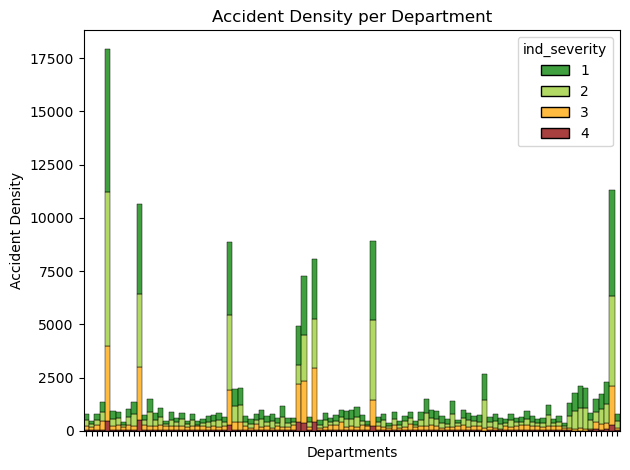

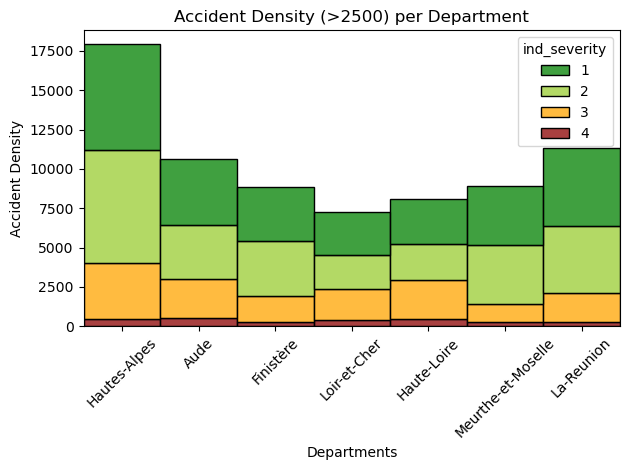

In [16]:
#------------------------------------------------------------------------------------------------
# show accident density per department
#
# accident density shows a different distribution from accident counts
#
# highest accident density appers to be in mostly mountainous, rural or remote areas (not true for all)
# for areas with low population size, foreigners, eg holiday guests, could create a bias
#------------------------------------------------------------------------------------------------

colors_grav_reorder = {1: 'green', 2: 'yellowgreen', 3: 'orange', 4: 'darkred'}

ax = sns.histplot(data=df_acc_target_pop, x='acc_department', hue='ind_severity', weights='acc_density', multiple='stack', 
                  palette=colors_grav_reorder, discrete=True) #, shrink=0.8

#ax.axhline(y=2500, color='red', linestyle='--', linewidth=1.5)

ax.set_xticklabels([])
ax.margins(x=0)

plt.xlabel('Departments')
plt.ylabel('Accident Density')
plt.title('Accident Density per Department')
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------------------------
# show high accident density > 2500
#------------------------------------------------------------------------------------------------

condition_high_acc_density = df_acc_target_pop['acc_density'] > 2500
dep_high_acc_density = df_acc_target_pop[condition_high_acc_density]['acc_department'].unique()

#df_acc_target_pop[df_acc_target_pop['acc_department'].isin(dep_high_acc_density.tolist())].sort_values(by=['acc_department','ind_severity'], ascending=True)

df_high_acc_density = df_acc_target_pop[df_acc_target_pop['acc_department'].isin(dep_high_acc_density.tolist())]

#dd=d[d['ind_severity'] == 4].sort_values(by=['ind_severity'], ascending=False)
#display(dd)

ax = sns.histplot(data=df_high_acc_density, x='dep_name', hue='ind_severity', weights='acc_density', multiple='stack', 
                  palette=colors_grav_reorder, discrete=True) #, shrink=0.8

ax.tick_params(axis='x', rotation=45)
ax.margins(x=0)

plt.xlabel('Departments')
plt.ylabel('Accident Density')
plt.title('Accident Density (>2500) per Department')
plt.tight_layout()
plt.show()


In [17]:
#------------------------------------------------------------------------------------------------
# show population info for departments with high accident density
#------------------------------------------------------------------------------------------------

cols_dep_filter = ['acc_department','dep_name','dep_capital','region','population','population_density']
df_dep_filter = df_high_acc_density[cols_dep_filter].drop_duplicates()
df_dep_filter = df_dep_filter.sort_values(by='population_density', ascending=True)

display(df_dep_filter)


,acc_department,dep_name,dep_capital,region,population,population_density
16,05,Hautes-Alpes,Gap,Provence-Alpes-Côte d’Azur,14122.0,26.0
172,43,Haute-Loire,Le Puy-en-Velay,Auvergne,22757.0,46.0
164,41,Loir-et-Cher,Blois,Centre,32947.0,52.0
40,11,Aude,Carcassonne,Languedoc-Roussillon,37407.0,61.0
108,29,Finistère,Quimper,Brittany,91509.0,136.0
216,54,Meurthe-et-Moselle,Nancy,Lorraine,73376.0,140.0
396,974,La-Reunion,Saint-Denis,Overseas,86121.0,344.0


In [18]:
#------------------------------------------------------------------------------------------------
# departments with high accident density
#------------------------------------------------------------------------------------------------

img = {'img_path': [path + 'dep_05_hautes_alpes.png',
                    path + 'dep_43_haute-loire.png',
                    path + 'dep_41_loir-et-cher.png',
                    path + 'dep_11_aude.png',
                    path + 'dep_29_finistere.png',
                    path + 'dep_45_meurthe-et-moselle.png',
                    path + 'dep_974_la-reunion.png']
       }

#display in one col
df_img = pd.DataFrame(img)
df_img['img_path'] = df_img['img_path'].apply(path_to_img_html, width=500)
#display(HTML(df_img.to_html(escape=False, render_links=True)))

#display in two cols
tag_head = '<div><table><tr>'
tag_close = '</table></div>'
tag = tag_head
i=0
while i<7:
    img_col1_src = img['img_path'][i]
    img_col1_tag = f"<tr><td><img src='{img_col1_src}' width='300px'></td>"
    i+=1
    if i<7:
        img_col2_src = img['img_path'][i]
        img_col2_tag = f"<td><img src='{img_col2_src}' width='300px'></td></tr>"
        tag += img_col1_tag + img_col2_tag
    else:
        tag += img_col1_tag + '<td> </td></tr>'
    i+=1
tag+=tag_close
HTML(tag)


,
,
,
,


In [19]:
# -------------------------------------------------------------------------------------------------
# export grouped accident dataframe with target variable and population info via joblib
# -------------------------------------------------------------------------------------------------
dump(df_acc_target_pop, (r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents_geo_grouped.joblib'))


['..\\..\\data\\processed\\2_preprocessing\\1.1-simmler-data-preprocessing_accidents_geo_grouped.joblib']